# Experimento 1: Knn con y sin PCA

En este experimento evaluamos el *accuracy* y los tiempos que toma el algoritmo Knn para distintos valores de $k$. También hacemos una comparación de la calidad y tiempo de los resultados aplicando PCA para algunos valores de $\alpha$.

In [1]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('../py')
from exp import *

# Include path to binaries on PATH variable
bin_path = os.path.join(os.path.dirname('../'))
os.environ['PATH'] = "{}:{}".format(bin_path, os.environ['PATH'])

In [2]:
X, y = load_data('../data/train.csv')

Para acelerar las pruebas, tomamos una muestra de 10000 observaciones de todo el conjunto de entrenamiento. Habiendo hecho un análisis previo, notamos que ese número es suficiente para que los siguientes resultados sean representativos de todo el dataset.

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, train_size=10000, random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1630: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
for train_index, _ in sss.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    break

In [5]:
X_train.shape, y_train.shape

((10000, 784), (10000,))

## Con muestras reducidas vamos a analizar los scores obtenidos variando $k$

Queremos ver como afecta el score la cantidad de vecinos. Es por eso que evaluamos el algoritmo sin PCA, con $k$ variando entre $[5..1000]$. Se tomó $1000$ como máximo dado que es el total del dataset ($10000$) dividido la cantidad de clases ($10$ dígitos).

In [6]:
def plot_accuracy_time(results, x, alpha=None):
    f, (ax_acc, ax_time) = plt.subplots(1, 2, sharex=True)
    f.set_figwidth(12)

    alpha_str = ' (alpha={})'.format(alpha) if alpha else ''
    ax_acc.set_title('Accuracy para $k$ entre ${}$ y ${}${}'.format(x[0], x[-1], alpha_str))
    ax_acc.set_ylabel('Accuracy')
    ax_acc.set_xlabel('$k$')
    ax_time.set_xlim(x[0], x[-1])
    ax_acc.grid(linestyle='-')
    ax_acc.plot(x, results['acc'])

    ax_time.set_title('Tiempo en segundos para $k$ entre ${}$ y ${}${}'.format(x[0], x[-1], alpha_str))
    ax_time.set_ylabel('Tiempo (seg)')
    miny = np.min(results['times']) - 20
    maxy = np.max(results['times']) + 20
    ax_time.set_ylim(miny, maxy)
    ax_time.set_xlabel('$k$')
    ax_time.set_xlim(x[0], x[-1])
    ax_time.grid(linestyle='-')
    ax_time.plot(x, results['times'])

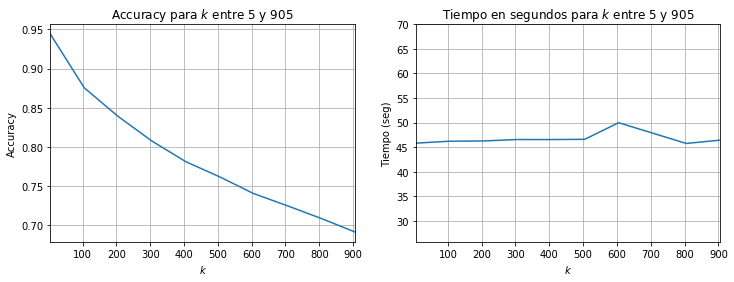

In [7]:
k_range = range(5, len(X_train)//10, 100)
results = run_experiment('exp1_k5-1000_nopca', crossval_incrementing_k, X_train, y_train, k_range, 999, 5, with_pca=False)
plot_accuracy_time(results, k_range)

### Ahora que vimos la pinta "global" del score con respecto al k, vemos que en los primeros valores están los mejores valores se encuentras en los k más chicos.

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 777 µs


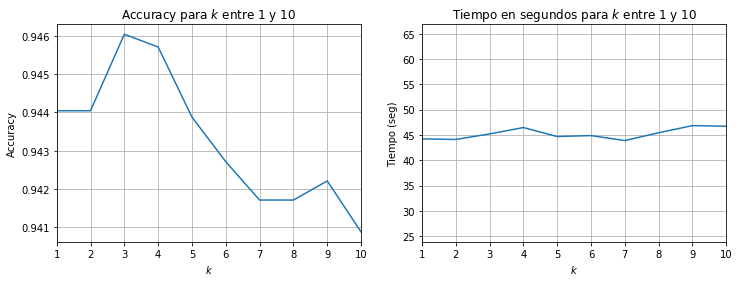

In [8]:
k_range = range(1, 11)
%time results = run_experiment('exp1_k1-10_nopca', crossval_incrementing_k, X_train, y_train, k_range, 999, 5, with_pca=False)
plot_accuracy_time(results, k_range)

## Con PCA

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 913 µs


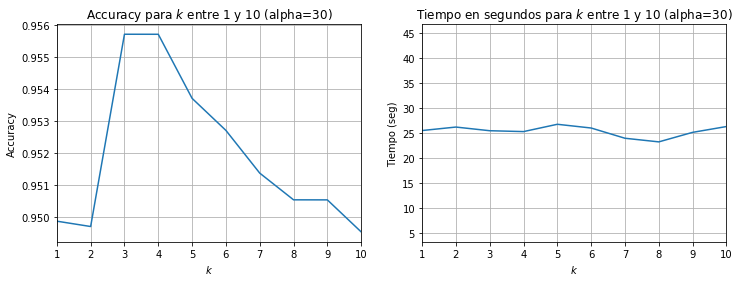

In [9]:
k_range = range(1, 11)
%time results = run_experiment('exp1_k1-10_alpha30', crossval_incrementing_k, X_train, y_train, k_range, 30, 5)
plot_accuracy_time(results, k_range, alpha=30)

#### Vamos a repetir el mismo experimento, pero con un alpha más grande

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 1.09 ms


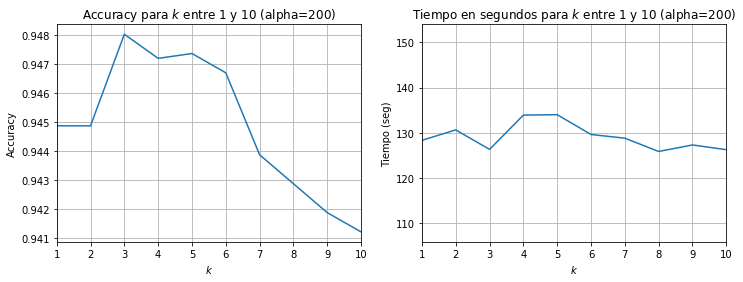

In [10]:
k_range = range(1, 11)
%time results = run_experiment('exp1_k1-10_alpha200', crossval_incrementing_k, X_train, y_train, k_range, 200, 5)
plot_accuracy_time(results, k_range, alpha=200)

Notamos que el comportamiento es similar, Para k=3, k=4 se tienen los mejores valores y a partir de ahí decrece la accuracy.

Ahora vamos a hacer el mismo experimento pero con alpha muy chico, en particular, igual a 2.

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 1.41 ms


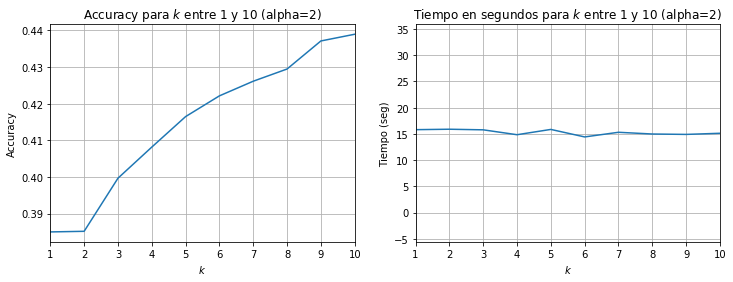

In [11]:
k_range = range(1, 11)
%time results = run_experiment('exp1_k1-10_alpha2', crossval_incrementing_k, X_train, y_train, k_range, 2, 5)
plot_accuracy_time(results, k_range, alpha=2)

Dado que con alpha 2 los resultados son pobres, vamos a ver qué sucede cuando tomamos un alpha chico, pero aumentamos el k.

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 655 µs


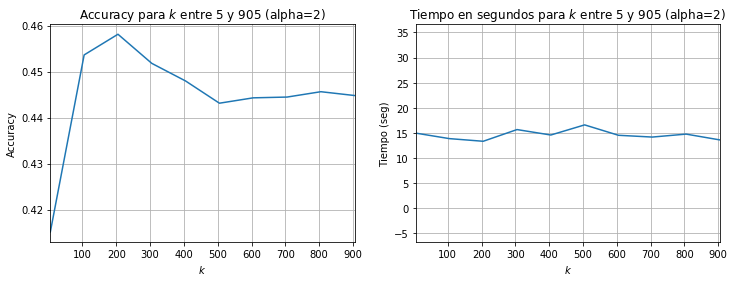

In [12]:
k_range = range(5, len(X_train)//10, 100)
%time results = run_experiment('exp1_k5-1000_alpha2', crossval_incrementing_k, X_train, y_train, k_range, 2, 5)
plot_accuracy_time(results, k_range, alpha=2)

### Grafico de accuracy y tiempo para k = 1..10, sin PCA, y con PCA de alphas=10, 20, 30, 50 y 100 

Generamos resultados para k=1..10, y alphas 10, 20, 30, 50 y 100 

In [13]:
k_range = range(1, 11)
alphas = [10, 20, 30, 50, 100]
for a in alphas:
    run_experiment('exp1_k1-10_alpha{}'.format(a), crossval_incrementing_k, X_train, y_train, k_range, a, 5)

Vamos a juntar los 4 resultados para k=1..10 con knn sin PCA, y con PCA con distintos valores de alpha, y comparar tanto accuracy como tiempos.

In [14]:
exps = ['exp1_k1-10_alpha{}'.format(i) for i in alphas]
res = dict((e.split('_')[-1], load_experiment(e)) for e in exps)
list(res.keys())

['alpha50', 'alpha100', 'alpha10', 'alpha20', 'alpha30']

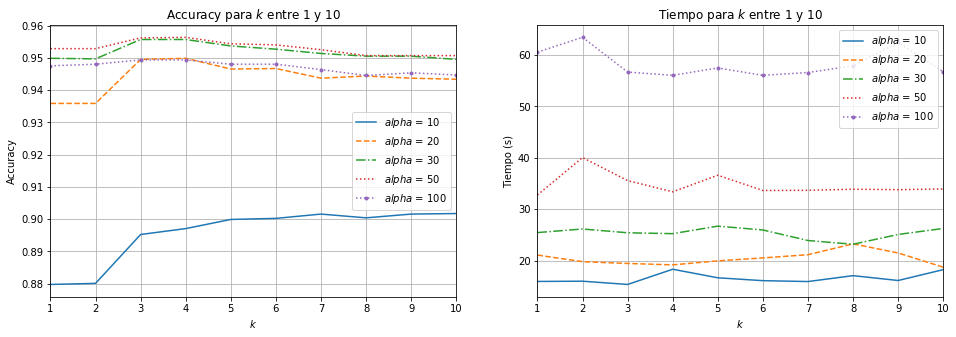

In [15]:
f, (ax_acc, ax_time) = plt.subplots(1, 2, sharex=True)
f.set_figwidth(16)
f.set_figheight(5)

def ax_args_for(t, metric, alphas):
    from itertools import chain, cycle
    lines = ["-", "--", "-.", ":", ":."]
    linecycler = cycle(lines)
    return chain(*[[t, res['alpha{}'.format(a)][metric], next(linecycler)] for a in alphas])

x = list(range(1, 11))

ax_acc.set_title('Accuracy para $k$ entre ${}$ y ${}$'.format(x[0], x[-1]))
ax_acc.set_ylabel('Accuracy')
ax_acc.set_xlabel('$k$')
ax_acc.set_xlim(1, 10)
ax_acc.plot(*ax_args_for(x, 'acc', alphas))
ax_acc.grid(linestyle='-')
ax_acc.legend(['$alpha$ = {}'.format(a) for a in alphas])

ax_time.set_title('Tiempo para $k$ entre ${}$ y ${}$'.format(x[0], x[-1]))
ax_time.set_ylabel('Tiempo (s)')
ax_time.set_xlabel('$k$')
ax_time.plot(*ax_args_for(x, 'times', alphas))
ax_time.grid()
ax_time.legend(['$alpha$ = {}'.format(a) for a in alphas]);